In [1]:
import os
import pandas as pd
import numpy as np
from cv2 import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
feather_dict = {
    'wiki': 'wiki_crop',
    'imdb': 'imdb',
    'utk': 'UTKFace',
    'cacd': 'cacd',
    'facial': 'Facial',
    'asia': 'All-Age-Faces',
    'afad': 'AFAD-Full'
}

In [3]:
'''
    input:  row: a row of data, containt encoded image information
            type: depend on which type of training, using just a original img or combine with 3 neighbor imgs
    output: an images list with decoded image information
'''
def image_decode(row, type='ori'):
    row = row[1]
    if type == 'ori':
        images_list = [row.img_ori]
    else:
        images_list = [row.img_box1, row.img_box2, row.img_box3]

    for idx, img in enumerate(images_list):
        img = np.frombuffer(img, np.uint8)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        images_list[idx] = img

    return images_list

In [4]:
'''
    input:  data_path: the folder that contants all avaiable data folder in *.feather
            source: which data will be used
    output: a dataframe which a combination of data in all sources 
'''
def load_data_all(data_path, source):
    source = source.split('|')
    init_df = True
    dataframe = pd.DataFrame()

    for s in source:
        feather_folder = feather_dict[s]
        feather_path = os.path.join(data_path, feather_folder)

        all_feather_files = os.listdir(feather_path)

        for feather in all_feather_files:

            feather_dir = os.path.join(feather_path, feather)
            loaded_data = pd.read_feather(feather_dir)

            # For first dataframe loaded
            if init_df:
                dataframe = loaded_data
                init_df = False
            else:
                dataframe = pd.concat([dataframe, loaded_data], ignore_index=True, sort=False)

            print(loaded_data.shape)
            print(feather_dir)
    print(dataframe.shape)

    # Filter
    dataframe = dataframe[(dataframe['age'] > 0) & (dataframe['age'] < 101)]
    dataframe = dataframe.dropna()

    return dataframe

## Change this to plot different dataset analysis

In [5]:
data = load_data_all("D:\\Dataset\\Feather", "imdb")

(8081, 6)
D:\Dataset\Feather\imdb\imdb_crop.feather
(38382, 6)
D:\Dataset\Feather\imdb\imdb_crop_100000.feather
(38706, 6)
D:\Dataset\Feather\imdb\imdb_crop_150000.feather
(38784, 6)
D:\Dataset\Feather\imdb\imdb_crop_200000.feather
(37283, 6)
D:\Dataset\Feather\imdb\imdb_crop_250000.feather
(37383, 6)
D:\Dataset\Feather\imdb\imdb_crop_300000.feather
(37136, 6)
D:\Dataset\Feather\imdb\imdb_crop_350000.feather
(37253, 6)
D:\Dataset\Feather\imdb\imdb_crop_400000.feather
(37054, 6)
D:\Dataset\Feather\imdb\imdb_crop_450000.feather
(38188, 6)
D:\Dataset\Feather\imdb\imdb_crop_50000.feather
(348250, 6)


In [6]:
def plot_count(idx, value):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(idx, value)
    plt.show()

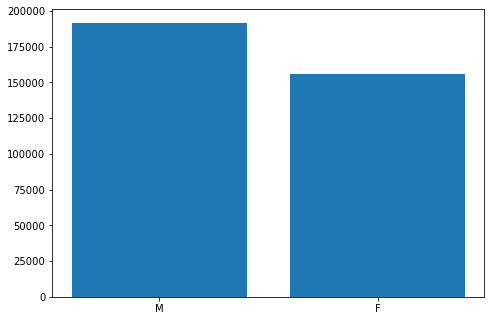

In [7]:
gen = data['gen'].value_counts().to_frame()
idx = ["M", "F"]
value = gen.gen
plot_count(idx, value)

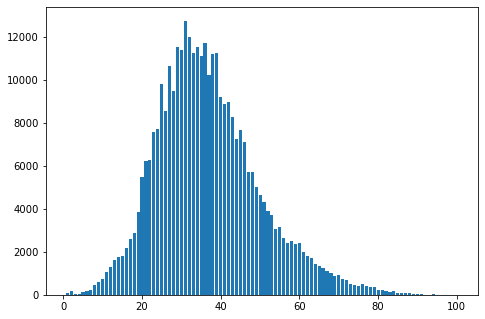

In [8]:
age = data['age'].value_counts().to_frame().sort_index()
idx = age.index
value = age.age
plot_count(idx, value)

In [9]:
age = 80
gap = 10
print(age)

80


In [10]:
def convert_age(age, gap):
    min_age = age - gap
    max_age = age + gap

    # print(min_age, max_age)

    # ls_min = np.logspace(0, 0.99, num=gap)/10
    # ls_max = np.logspace(0.99, 0, num=gap)/10

    # ls_min = np.linspace(0, 0.99, num=gap)
    # ls_max = np.linspace(0.99, 0, num=gap)

    ls = np.linspace(0, 0.99, num=gap + 1)
    # ls = np.logspace(0, 0.99, num=gap + 1)/10
    ls_mirror = np.concatenate([ls[:-1], ls[::-1]])

    # print(ls_mirror)
    # print(ls_mirror.shape)

    if min_age <= 0:
        # a[0:age+1] = [0, ls_min[-min_age:]]
        # a[age-1:max_age] = ls_max[-1:]
        # a[0:len(ls[-min_age:])] = ls[-min_age-1:]

        ls_filter = ls_mirror[-min_age:]
        output = np.concatenate([ls_filter, np.zeros(shape=100-len(ls_filter))])

    elif max_age >= 100:
        # a[min_age+1:age+1] = ls_min
        # a[age:101] = ls_max[:max_age-100+1]

        ls_filter = ls_mirror[:100-min_age]
        output = np.concatenate([np.zeros(shape=100-len(ls_filter)), ls_filter])
        
    else:
        output = np.concatenate([np.zeros(shape=min_age), ls_mirror, np.zeros(shape=100-max_age-1)])
        # print(output.shape)
        
    # plt.bar(output)
    # print(output[age-2], output[age-1], output[age], output[age+1], output[age+2])
    return output

In [11]:
a30 = convert_age(30, gap)
a30_3 = convert_age(30, 3)
a30_5 = convert_age(30, 5)
a30_7 = convert_age(30, 7)

In [13]:
name = np.arange(100)
name.shape

(100,)

In [14]:
a30[a30 == 0] = 0.001
a30_3[a30_3 == 0] = 0.001
a30_5[a30_5 == 0] = 0.001
a30_7[a30_7 == 0] = 0.001

In [15]:
a30.shape

(100,)

NameError: name 'gradientbars' is not defined

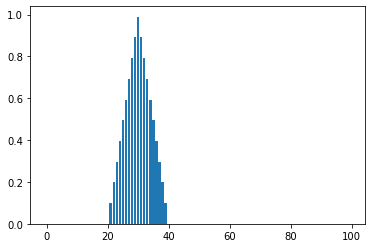

In [16]:
# plt.bar(name, a30)
# # plt.plot(a30)

fig, ax = plt.subplots()

bar = ax.bar(name,a30)

gradientbars(bar)

plt.show() 

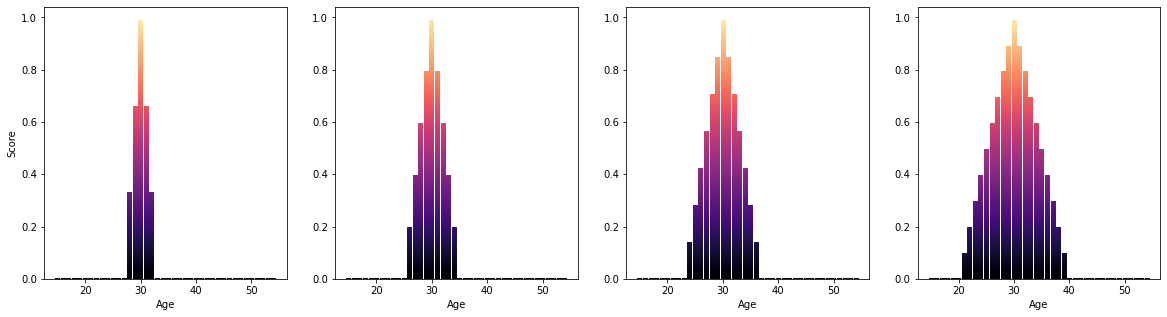

In [18]:

fig, ax = plt.subplots(1, 4, figsize=[20, 5])

bar = ax[0].bar(name[15:55], a30_3[15:55])
bar1 = ax[1].bar(name[15:55], a30_5[15:55])
bar2 = ax[2].bar(name[15:55], a30_7[15:55])
bar3 = ax[3].bar(name[15:55], a30[15:55])

ax[0].set_ylabel('Score')

ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[2].set_xlabel('Age')
ax[3].set_xlabel('Age')


def gradientbars_sliced(bars):
    ax = bars[0].axes
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.linspace(y, y + h, 256).reshape(256, 1)
        ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
                  vmin=ymin, vmax=ymax, cmap='magma')
    ax.axis([xmin, xmax, ymin, ymax])

gradientbars_sliced(bar)
gradientbars_sliced(bar1)
gradientbars_sliced(bar2)
gradientbars_sliced(bar3)

plt.savefig('age.jpg')


In [134]:
import tensorflow as tf
from focal_loss import sparse_categorical_focal_loss
from focal_loss import SparseCategoricalFocalLoss
from tensorflow.keras import backend as K

In [16]:
y_true = a30
y_pred = a31
# Using 'auto'/'sum_over_batch_size' reduction type.
kl = tf.keras.losses.KLDivergence()
kl(y_true, y_pred).numpy()

1.5946951056493552

In [17]:
y_true = a30
y_pred = a35
# Using 'auto'/'sum_over_batch_size' reduction type.
kl = tf.keras.losses.KLDivergence()
kl(y_true, y_pred).numpy()

25.180986516794974

In [18]:
y_true = a30
y_pred = a25
# Using 'auto'/'sum_over_batch_size' reduction type.
kl = tf.keras.losses.KLDivergence()
kl(y_true, y_pred).numpy()

25.180986516794974

In [130]:
y_true = a30
y_pred = a31

In [35]:
y_pred

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.099, 0.198, 0.297, 0.396, 0.495,
       0.594, 0.693, 0.792, 0.891, 0.99 , 0.891, 0.792, 0.693, 0.594,
       0.495, 0.396, 0.297, 0.198, 0.099, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [43]:
import numpy as np
from focal_loss import sparse_categorical_focal_loss
y_true = [0, 1, 5]
y_pred = [[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.2, 0.2, 0.6]]
loss = sparse_categorical_focal_loss(y_true, y_pred, gamma=2)
np.set_printoptions(precision=3)
print(loss.numpy())

[0.009 0.032   nan]


In [102]:
def focal_loss(classes_num, gamma=2., alpha=.25, e=0.1):
    # classes_num contains sample number of each classes
    # copy from https://github.com/maozezhong/focal_loss_multi_class/blob/master/focal_loss.py
    def focal_loss_fixed(target_tensor, prediction_tensor):
        '''
        prediction_tensor is the output tensor with shape [None, 100], where 100 is the number of classes
        target_tensor is the label tensor, same shape as predcition_tensor
        '''
        import tensorflow as tf
        from tensorflow.python.ops import array_ops
        
        print(classes_num.shape)
        print(prediction_tensor.shape)
        

        # 1# get focal loss with no balanced weight which presented in paper function (4)
        zeros = array_ops.zeros_like(prediction_tensor, dtype=prediction_tensor.dtype)
        one_minus_p = array_ops.where(tf.greater(target_tensor, zeros), target_tensor - prediction_tensor, zeros)
        FT = -1 * (one_minus_p ** gamma) * tf.math.log(tf.clip_by_value(prediction_tensor, 1e-6, 1.0))

        # 2# get balanced weight alpha
        classes_weight = array_ops.zeros_like(prediction_tensor, dtype=prediction_tensor.dtype)
        print(classes_weight)
        total_num = float(sum(classes_num))
        classes_w_t1 = [(total_num / ff if ff != 0 else 0.0) for ff in classes_num]
        sum_ = sum(classes_w_t1)
        classes_w_t2 = [ff / sum_ for ff in classes_w_t1]  # scale
        # print(classes_w_t2)
        classes_w_tensor = tf.convert_to_tensor(classes_w_t2, dtype=prediction_tensor.dtype)
        
        print(classes_w_tensor)
        
        classes_weight += classes_w_tensor

        alpha = array_ops.where(tf.greater(target_tensor, zeros), classes_weight, zeros)

        # 3# get balanced focal loss
        balanced_fl = alpha * FT
        balanced_fl = tf.reduce_mean(balanced_fl)

        # 4# add other op to prevent overfit
        # reference : https://spaces.ac.cn/archives/4493
        nb_classes = len(classes_num)
        fianal_loss = (1 - e) * balanced_fl + e * K.categorical_crossentropy(
            K.ones_like(prediction_tensor) / nb_classes, prediction_tensor)
        return fianal_loss

    return focal_loss_fixed

In [74]:
age_dist = [data["age"][(data.age >= x -10) & (data.age <= x)].count() for x in range(10, 10 * 12 + 1, 10)]
age_dist = [age_dist[0]] + age_dist + [age_dist[-1]]

In [99]:
age_dist = age.to_numpy().squeeze()
print(age_dist)
# age_dist = [age_dist[0]] + age_dist + [age_dist[-1]]
# print(age_dist)

[   67   158    54    52   120   182   238   465   616   752  1109  1306
  1659  1819  1906  2359  2919  3397  4636  6438  7452  7710  9216  9405
 11433 10302 12275 10977 12903 12644 13899 13096 12228 12409 11910 12476
 10924 11916 11873  9810  9488  9564  8841  7841  8213  7676  6273  6215
  5568  5143  4803  4404  4166  3429  3567  3032  2810  2832  2697  2762
  2299  2111  2028  1710  1585  1492  1325  1259  1081  1128   920   863
   656   598   548   637   523   460   444   356   319   278   197   233
   149   120   133   117    57    65    71    37    33    27    13    16
    15     3     7    16]


In [ ]:
y_true = a30
y_pred = a30
y_true = tf.constant(y_true)
y_pred = tf.constant(y_pred)
# age_dist = tf.constant(age_dist)

In [140]:
y_true

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.099, 0.198, 0.297, 0.396, 0.495, 0.594,
       0.693, 0.792, 0.891, 0.99 , 0.891, 0.792, 0.693, 0.594, 0.495,
       0.396, 0.297, 0.198, 0.099, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])>

In [141]:
y_pred

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.099, 0.198, 0.297, 0.396, 0.495, 0.594,
       0.693, 0.792, 0.891, 0.99 , 0.891, 0.792, 0.693, 0.594, 0.495,
       0.396, 0.297, 0.198, 0.099, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])>

In [142]:
focal_loss(age_dist)(y_true, y_pred)

(100,)
(100,)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], shape=(100,), dtype=float64)
tf.Tensor(
[1.420e-02 6.021e-03 1.762e-02 1.829e-02 7.928e-03 5.227e-03 3.997e-03
 2.046e-03 1.544e-03 1.265e-03 8.578e-04 7.284e-04 5.734e-04 5.230e-04
 4.991e-04 4.033e-04 3.259e-04 2.800e-04 2.052e-04 1.478e-04 1.277e-04
 1.234e-04 1.032e-04 1.012e-04 8.321e-05 9.234e-05 7.750e-05 8.667e-05
 7.373e-05 7.524e-05 6.845e-05 7.264e-05 7.780e-05 7.666e-05 7.988e-05
 7.625e-05 8.709e-05 7.984e-05 8.013e-05 9.698e-05 1.003e-04 9.947e-05
 1.076e-04 1.213e-04 1.158e-04 1.239e-04 1.517e-04 1.531e-04 1.709e-04
 1.850e-04 1.981e-04 2.160e-04 2.284e-04 2.774e-04 2.667e-04 3.138e-04
 3.386e-04 3.359e-04 3.527e-04 3.444e-04 4.138e-04 4.507e-04

<tf.Tensor: shape=(), dtype=float64, numpy=1.3651577412082407>

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, Activation, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Model
import os

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [20]:
inputs = Input(shape=[60,60,3])
x = Conv2D(20, kernel_size=5, strides=1)(inputs)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(40, kernel_size=7, strides=1)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(80, kernel_size=11, strides=1)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)

x = Flatten()(x)

model = Model(inputs=inputs, outputs=[x])

In [21]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 20)        1520      
                                                                 
 activation_12 (Activation)  (None, 56, 56, 20)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 56, 56, 20)       80        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 20)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 22, 22, 40)        3924

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [54]:
his = np.load("historyFalse_100", allow_pickle=True)

In [55]:
def visual_history(save_file_path, history, name):
    epoch = np.arange(100)
    # history = history.history
    
    # print(len(history['loss']))

    try:
        history.pop('lr', None)
    except:
        pass

    assert len(history) % 2 == 0, 'History format error.'

    half = int(len(history) / 2)
    fig, ax = plt.subplots(half, 1, figsize=[10, 20])

    for idx, key in enumerate(history):
        if idx >= half:
            idx -= half
        ax[idx].plot(epoch, history[key], label=key)
        ax[idx].legend()

    fig.savefig('{}chart_{}.jpg'.format(save_file_path, name))

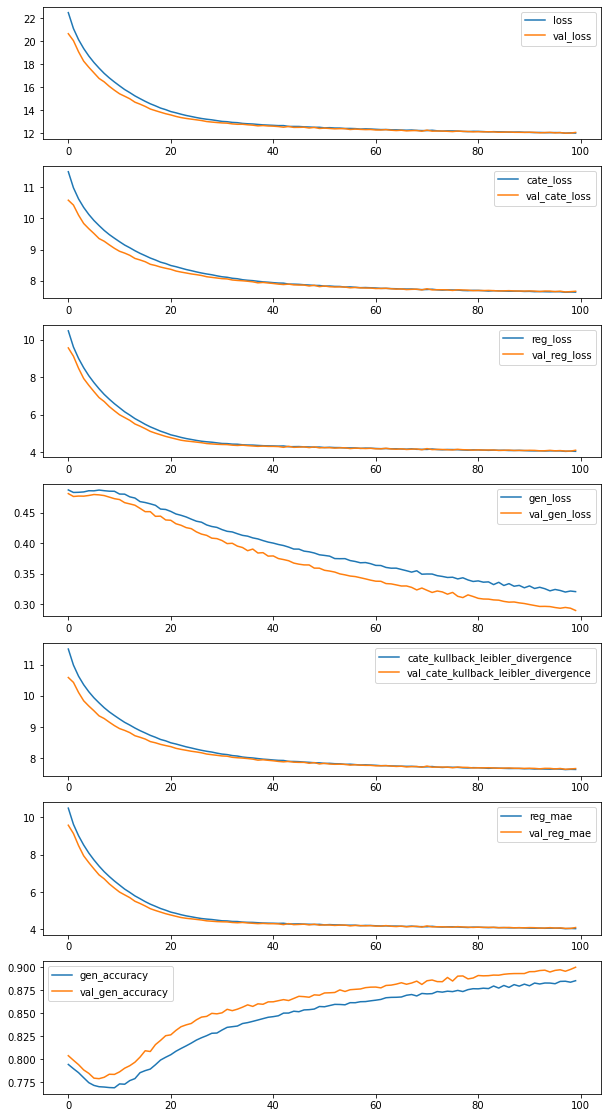

In [56]:
visual_history("", his, 'test.jpg')

In [3]:
import cv2

In [62]:
img = cv2.imread('..\\tin.jpg')
print(img.shape)

(720, 1280, 3)


In [64]:
cv2.imshow("s", img); cv2.waitKey()

-1

In [67]:
img = cv2.resize(img, (160, 160))

In [70]:
img = img / 255.0

In [72]:
cv2.imshow("s", img); cv2.waitKey()

-1

In [76]:
t = os.listdir("..\\test")

In [107]:
imgs = []
for i in t:
    d = "..\\test\\" + i
    img = cv2.imread(d)
    img = cv2.resize(img, (160, 160))
    img = img / 255.0
    print(img.shape)
    imgs.append(img)
    
print(len(imgs)) 

np_imgs = np.zeros(shape=[6, 160, 160, 3])

np_imgs[0] = imgs[0]
np_imgs[1] = imgs[1]
np_imgs[2] = imgs[2]
np_imgs[3] = imgs[3]
np_imgs[4] = imgs[4]
np_imgs[5] = imgs[5]

# np_imgs = np.append([], [imgs[0],
#                     imgs[1],
#                     imgs[2],
#                     imgs[3],
#                     imgs[4],
#                     imgs[5]], axis=1)

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
6


In [109]:
np_imgs.shape

(6, 160, 160, 3)

In [8]:
t = os.listdir("..\\test1\\face_data\\face_data")
d = "..\\test1\\face_data\\face_data"

In [25]:
for folder in t:
    # print(os.path.join(d, folder))
    imgs_list = os.path.join(d, folder)
    print(imgs_list)
    for imgdir in os.listdir(imgs_list):
        idir = os.path.join(imgs_list, imgdir)
        print(idir)
        img = cv2.imread(idir)
        img = cv2.resize(img, (160, 160))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)
        print(img.shape)
        break
    break

..\test1\face_data\face_data\Abhijeet_31
..\test1\face_data\face_data\Abhijeet_31\0.jpg
(160, 160, 3)
